# Beautiful Soup Web Scraping Assigment

Import libraries and web link

In [2]:
import seaborn
from bs4 import BeautifulSoup
import requests as rq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Get website using Python requests and create Beautiful Soup object using BS4.
webpage = rq.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")
soup = BeautifulSoup(webpage.content, "html.parser")

Separate rating data

In [3]:
ratings_data = soup.find_all(attrs={"class": "Rating"})
ratings = []
for rating in ratings_data[1:]:
  ratings.append(float(rating.string))
#Sample of data
print(ratings[:10])

[3.75, 2.75, 3.0, 3.5, 3.5, 2.75, 3.5, 3.5, 3.75, 4.0]


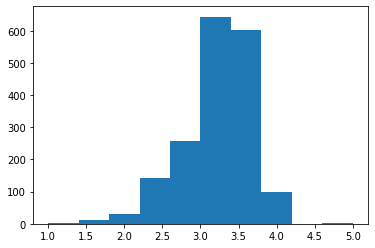

In [4]:
plt.hist(ratings)
plt.show()

In [7]:
#Selecting Companies with the highest ratings
company_data = soup.select(".Company")
companies = []
for company in company_data[1:]:
  companies.append(company.string)
#print(companies)
df_dict = {"Company": companies, "Rating": ratings}

In [11]:
#Determining whether percentage of Cacao affects the ratings score
cacao_percent = []
cacao_data = soup.select(".CocoaPercent")
#print(cacao_data)
for cacao in cacao_data[1:]:
  percent = int(float(cacao.get_text().strip("%")))
  cacao_percent.append(percent)

#Sample data from percentage list
print(cacao_percent[:10])
#Adding column for Cacao percentage by adding to dictionary
df_dict["CacaoPercentage"] = cacao_percent




[63, 70, 70, 70, 70, 70, 70, 70, 70, 70]


Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


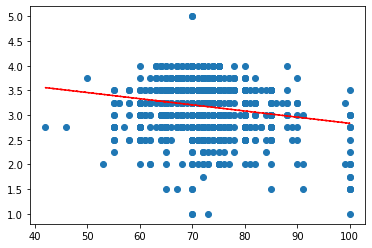

In [12]:
#Create Pandas data frame from dictionary
df = pd.DataFrame.from_dict(df_dict)
average_ratings = df.groupby("Company").Rating.mean()
top_ten = average_ratings.nlargest(10)
print(top_ten)

#Scatterplot for perecentage of Cacao to ratings, using NumPy to approximate line
plt.clf()
plt.scatter(df.CacaoPercentage, df.Rating)
z = np.polyfit(df.CacaoPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CacaoPercentage, line_function(df.CacaoPercentage), "r--")
plt.show()